### **Name: Rucha Parekh**
### **<br>Sap ID: 60009230208**

### **Importing Libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### **Reading the data**

In [5]:
data = pd.read_csv("tips.csv")
print(data.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


# **EDA (Exploratory Data Analysis)**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [8]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [9]:
data.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### **Let’s have a look at the tips given to the waiters according to:**

###    the total bill paid
###    number of people at a table
###    and the day of the week:

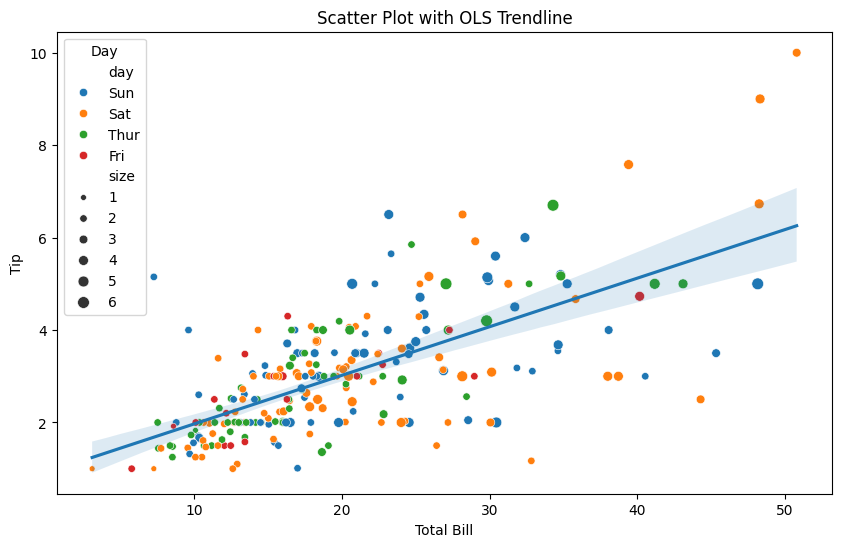

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.scatterplot(data=data, x="total_bill", y="tip", size="size", hue="day")

# Add trendline (OLS regression line)
sns.regplot(data=data, x="total_bill", y="tip", scatter=False)

plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Scatter Plot with OLS Trendline")

plt.legend(title="Day")

plt.show()

### **Now let’s have a look at the tips given to the waiters according to:**
###    the total bill paid
###    the number of people at a table
###    and the gender of the person paying the bill:

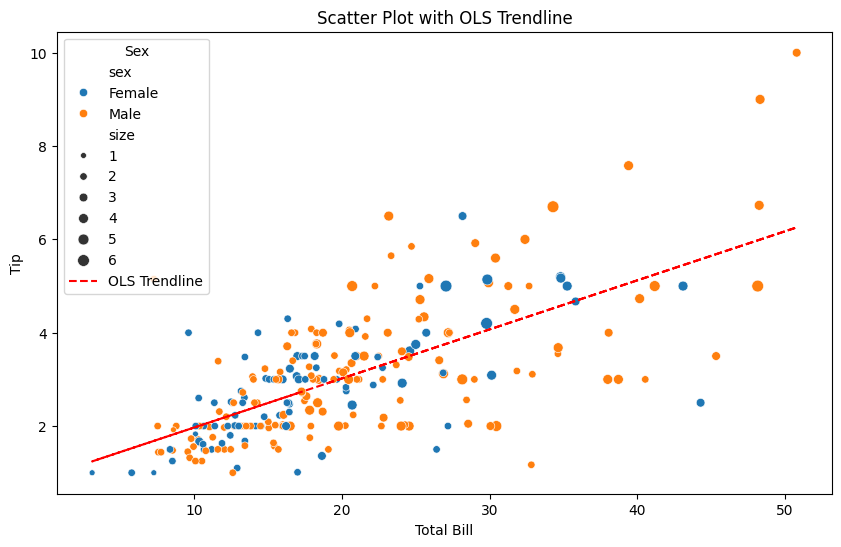

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="total_bill", y="tip", size="size", hue="sex")

# Calculate and plot the Ordinary Least Squares (OLS) trendline
ols_coeff = np.polyfit(data["total_bill"], data["tip"], 1)
ols_line = np.poly1d(ols_coeff)
plt.plot(data["total_bill"], ols_line(data["total_bill"]), color='red', linestyle='--', label='OLS Trendline')

plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Scatter Plot with OLS Trendline")
plt.legend(title="Sex")

plt.show()

### **Bar graph for tips given according to the day of the week**

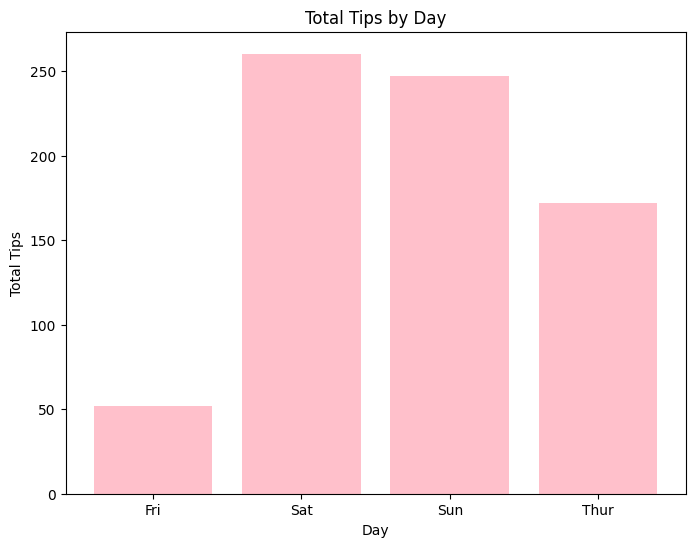

In [13]:
import matplotlib.pyplot as plt

# Calculate the total tips for each day
total_tips_per_day = data.groupby('day')['tip'].sum().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(total_tips_per_day['day'], total_tips_per_day['tip'], color='pink')

plt.xlabel('Day')
plt.ylabel('Total Tips')
plt.title('Total Tips by Day')

plt.show()

C:\Users\rucha\AppData\Local\Temp\ipykernel_17776\1961505873.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')


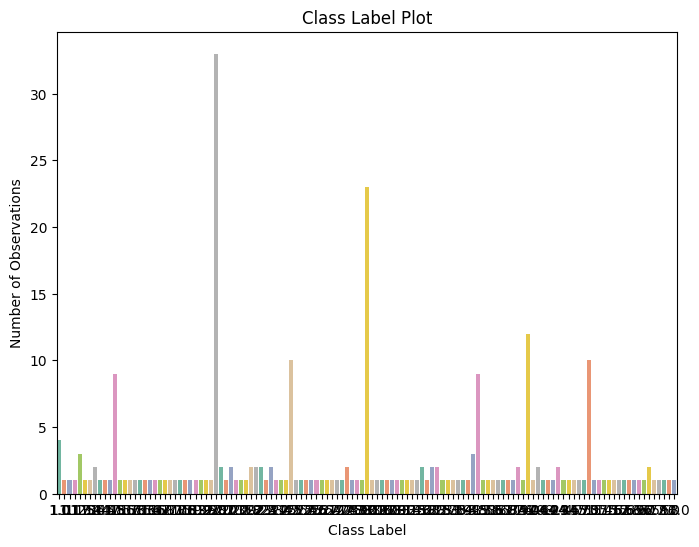

In [14]:
import matplotlib.pyplot as plt

class_counts = data['tip'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')

plt.xlabel('Class Label')
plt.ylabel('Number of Observations')
plt.title('Class Label Plot')

plt.show()


### **Number of tips given according to gender**

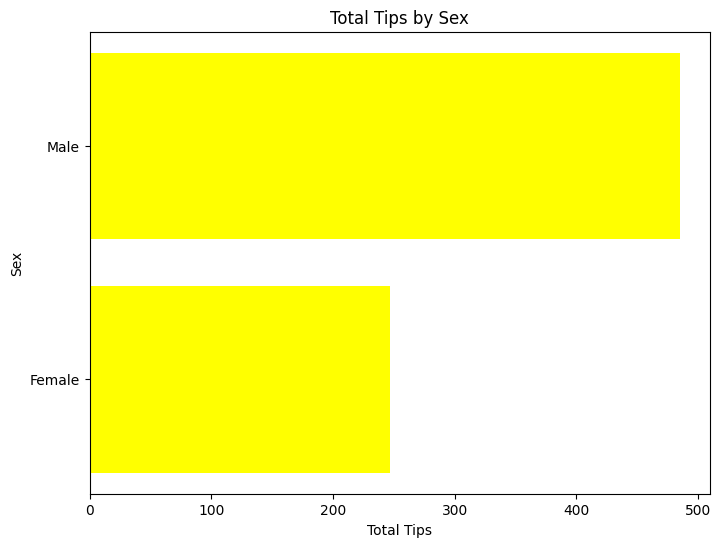

In [15]:
# Calculate the total tips for each gender
total_tips_per_sex = data.groupby('sex')['tip'].sum().reset_index()

plt.figure(figsize=(8, 6))
plt.barh(total_tips_per_sex['sex'], total_tips_per_sex['tip'], color='yellow')

plt.xlabel('Total Tips')
plt.ylabel('Sex')
plt.title('Total Tips by Sex')

plt.show()


### **Tips given by smokers and non-smokers**

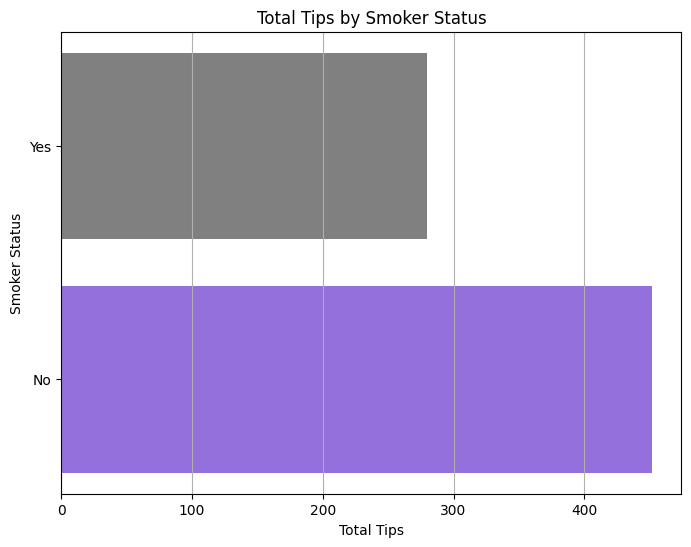

In [17]:
# Calculate the total tips for each smoker status
total_tips_per_smoker = data.groupby('smoker')['tip'].sum().reset_index()

plt.figure(figsize=(8, 6))

plt.barh(total_tips_per_smoker['smoker'], total_tips_per_smoker['tip'], color=['mediumpurple', 'gray'])

plt.ylabel('Smoker Status')
plt.xlabel('Total Tips')
plt.title('Total Tips by Smoker Status')
plt.grid(axis='x')
plt.show()

### **More tips during lunch or dinner?**

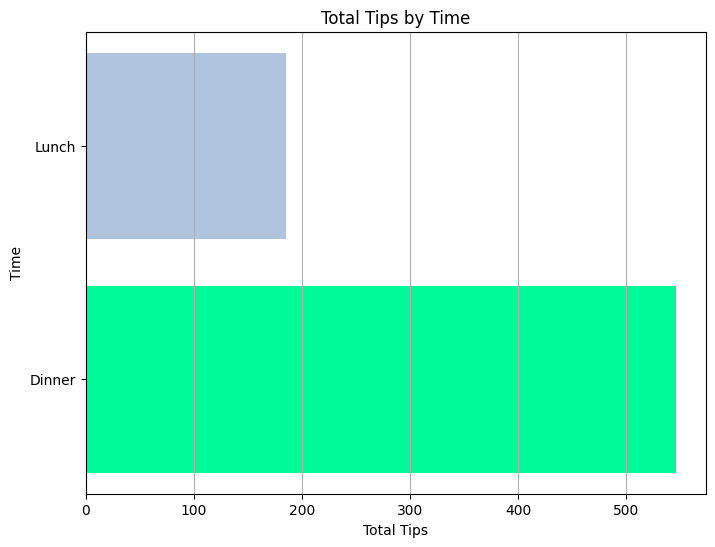

In [18]:
# Calculate the total tips for each time
total_tips_per_time = data.groupby('time')['tip'].sum().reset_index()

plt.figure(figsize=(8, 6))

plt.barh(total_tips_per_time['time'], total_tips_per_time['tip'], color=['mediumspringgreen', 'lightsteelblue'])

plt.xlabel('Total Tips')
plt.ylabel('Time')
plt.title('Total Tips by Time')
plt.grid(axis='x')
plt.show()

# **PRE-PROCCESING**

### **Label encoding**

In [19]:
data["sex"] = data["sex"].map({"Female": 0, "Male": 1})
data["smoker"] = data["smoker"].map({"No": 0, "Yes": 1})
data["day"] = data["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})
data["time"] = data["time"].map({"Lunch": 0, "Dinner": 1})
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


### **Identifying and removing null values**

In [20]:
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


### **Detecting Outliers**

Indices of outliers:
total_bill
Index([59, 156, 170, 212], dtype='int64')
tip
Index([23, 170, 212], dtype='int64')
sex
Index([], dtype='int64')
smoker
Index([], dtype='int64')
day
Index([], dtype='int64')
time
Index([], dtype='int64')
size
Index([125, 141, 143, 156], dtype='int64')


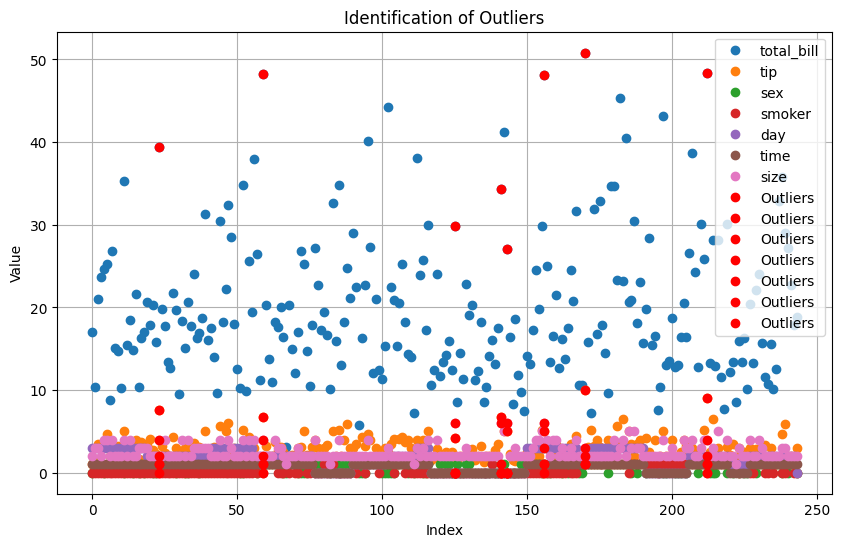

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.DataFrame(data)

# Calculate Z-scores for each numerical column
z_scores = (data - data.mean()) / data.std()

# Define threshold for outlier detection
threshold = 3.0

# Identify outliers
outliers = (z_scores > threshold) | (z_scores < -threshold)

print("Indices of outliers:")
for col in outliers.columns:
    print(col)
    print(data.index[outliers[col]])

plt.figure(figsize=(10, 6))
for col in data.columns:
    plt.plot(data.index, data[col], 'o', label=col)
plt.plot(data.index[outliers.any(axis=1)], data[outliers.any(axis=1)], 'ro', label='Outliers')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Identification of Outliers')
plt.legend()
plt.grid(True)
plt.show()


### **Removing Outliers**

In [22]:
data_cleaned = data[~outliers.any(axis=1)]

print("Cleaned DataFrame without outliers:\n", data_cleaned)


Cleaned DataFrame without outliers:
      total_bill   tip  sex  smoker  day  time  size
0         16.99  1.01    0       0    3     1     2
1         10.34  1.66    1       0    3     1     3
2         21.01  3.50    1       0    3     1     3
3         23.68  3.31    1       0    3     1     2
4         24.59  3.61    0       0    3     1     4
..          ...   ...  ...     ...  ...   ...   ...
239       29.03  5.92    1       0    2     1     3
240       27.18  2.00    0       1    2     1     2
241       22.67  2.00    1       1    2     1     2
242       17.82  1.75    1       0    2     1     2
243       18.78  3.00    0       0    0     1     2

[236 rows x 7 columns]


###**Remove leading and trailing spaces from all columns**

In [23]:
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

### **Dropping Cells with missing values**

In [24]:
data.dropna(inplace=True)

### **Preprocessed data**

In [25]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


### **Splitting data into training and testing sets**

In [27]:
from sklearn.model_selection import train_test_split

x = np.array(data[["total_bill", "sex", "smoker", "day", "time", "size"]])
y = np.array(data["tip"])

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# **Fitting Models**

### **Linear Regression**

Linear regression models the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship, aiming to find the best-fitting line through the data points. The model estimates coefficients to minimize the sum of squared differences between observed and predicted values. In scikit-learn, fitting a linear regression model involves creating an instance of the LinearRegression class, calling the fit method with training data, making predictions with test data, and evaluating performance using metrics like mean squared error.

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Fit linear regression model
model = LinearRegression()
model.fit(xtrain, ytrain)

# Make predictions on the test set
ypred = model.predict(xtest)

# Calculate mean squared error
mse = mean_squared_error(ytest, ypred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.6963090766605344


### **Lasso Regression**

Lasso regression, short for Least Absolute Shrinkage and Selection Operator, is a linear regression technique that adds a penalty term to the ordinary least squares (OLS) method, known as L1 regularization. This penalty term, controlled by the hyperparameter alpha, encourages sparsity by shrinking some coefficients to exactly zero, effectively performing feature selection. The provided code snippet demonstrates how to implement Lasso regression using scikit-learn, including model fitting, prediction, and evaluation using mean squared error.

In [30]:
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(xtrain, ytrain)

ypred_lasso = lasso_model.predict(xtest)

mse_lasso = mean_squared_error(ytest, ypred_lasso)
print("Mean Squared Error (Lasso):", mse_lasso)

Mean Squared Error (Lasso): 0.5908528649971524


### **Ridge Regression**

Ridge regression is a linear regression technique that adds a penalty term to the ordinary least squares (OLS) method, known as L2 regularization. This penalty term, controlled by the hyperparameter alpha, helps to prevent overfitting by penalizing large coefficients. The code snippet demonstrates how to implement Ridge regression using scikit-learn, including fitting the model, making predictions, and calculating the mean squared error to evaluate model performance.

In [31]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(xtrain, ytrain)

ypred_ridge = ridge_model.predict(xtest)

mse_ridge = mean_squared_error(ytest, ypred_ridge)
print("Mean Squared Error (Ridge):", mse_ridge)

Mean Squared Error (Ridge): 0.6937386882538844


### **Decision Tree Regressor**

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree_model = DecisionTreeRegressor()
tree_model.fit(xtrain, ytrain)

ypred_tree = tree_model.predict(xtest)

mse_tree = mean_squared_error(ytest, ypred_tree)
print("Mean Squared Error (Decision Tree):", mse_tree)

Mean Squared Error (Decision Tree): 1.1436285714285714


### **Support Vector Regressor**

In [33]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')
svr_model.fit(xtrain, ytrain)

ypred_svr = svr_model.predict(xtest)

mse_svr = mean_squared_error(ytest, ypred_svr)
print("Mean Squared Error (Support Vector Regressor):", mse_svr)


Mean Squared Error (Support Vector Regressor): 0.5333294841580878


# **Testing**

In [40]:
features = np.array([[24.50, 1, 0, 0, 1, 4]])
prediction = svr_model.predict(features)
predicted_tip = float(prediction[0]) 
print(predicted_tip) 

3.693493377499088


# **Comaparison of different Models**

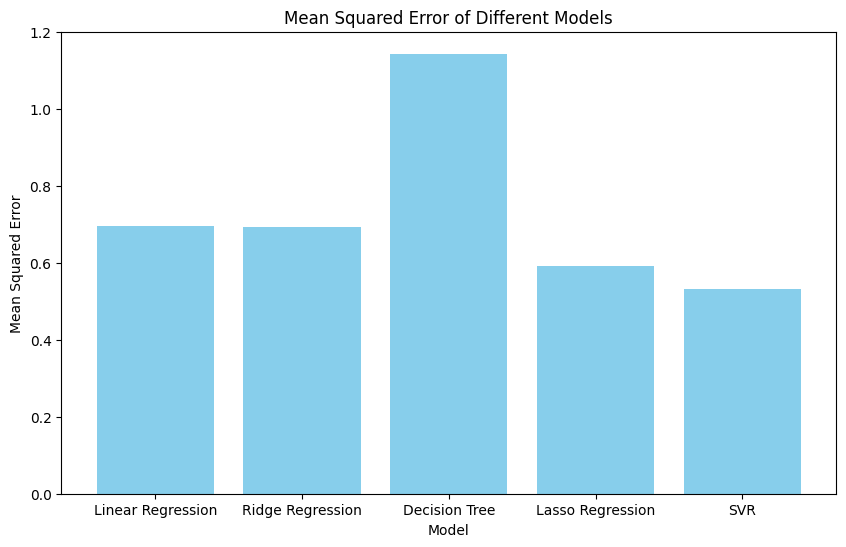

In [35]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Ridge Regression', 'Decision Tree', 'Lasso Regression', 'SVR']

mse_values = [mse, mse_ridge, mse_tree, mse_lasso, mse_svr]

plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error of Different Models')
plt.show()

In [36]:
import pickle

# Save the trained model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as model.pkl")

Model saved as model.pkl


# **Conclusion**

After conducting a comprehensive analysis of a dataset on waiter tips, including attributes like total bill, sex, smoker or non-smoker, day, time and size. Through meticulous preprocessing and exploratory data analysis, we gained valuable insights into the dataset's characteristics. We trained and evaluated five machine learning models, Linear Regression, Lasso Regression, Decision Tree Regressor, Support Vector Regression and Ridge Regression for predicting waiter tips. Among them, SVR consistently outperformed others in predictive accuracy, followed closely by Ridge Regression.
This suggests that the SVR model effectively captured the underlying patterns and relationships present in the dataset, enabling it to make accurate predictions regarding various tip attributes.